# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

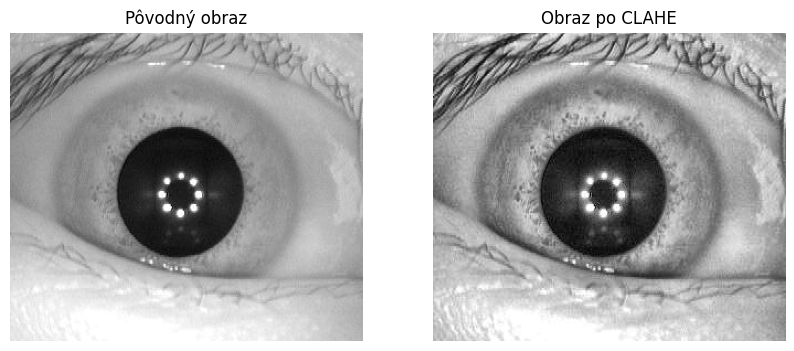

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Načítanie obrazu
image = cv2.imread('S1004R03.jpg', cv2.IMREAD_GRAYSCALE)

# Vytvorenie objektu CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Aplikovanie CLAHE
clahe_image = clahe.apply(image)

# Zobrazenie výsledkov
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Pôvodný obraz')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Obraz po CLAHE')
plt.axis('off')

plt.show()


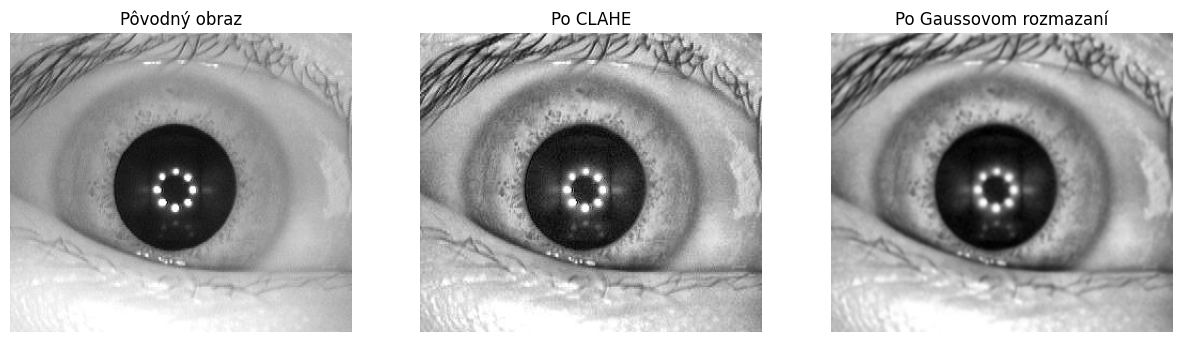

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Načítanie obrázka v odtieňoch sivej
image = cv2.imread('S1004R03.jpg', cv2.IMREAD_GRAYSCALE)  

# Aplikovanie CLAHE (zlepšenie kontrastu)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(image)

# Aplikovanie Gaussovho rozmazania
blurred_image = cv2.GaussianBlur(clahe_image, (5,5), 0)  # Kernel (5x5), sigma=0 (automaticky dopočíta)

# Zobrazenie výsledkov
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Pôvodný obraz')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(clahe_image, cmap='gray')
plt.title('Po CLAHE')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Po Gaussovom rozmazaní')
plt.axis('off')

plt.show()
